In [169]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [155]:
data = pd.read_csv("data.csv")
data.head()

,year,month,day,anger_score,disgust_score,fear_score,joy_score,sadness_score,anger_count,disgust_count,fear_count,joy_count,sadness_count,close,open,high,low,change
0,2011,4,11,23.678598,1.862068,3.365532,129.260966,22.046661,28,2,4,150,26,12381.11,12380.43,12476.93,12319.35,0.0001
1,2011,4,12,23.436641,1.568504,1.807040,110.107599,28.552481,28,2,2,128,33,12263.58,12381.04,12381.04,12185.09,-0.9500
2,2011,4,13,17.595715,3.441165,3.351268,103.535217,17.206766,21,4,4,121,21,12270.99,12263.73,12372.94,12203.63,0.0006
3,2011,4,14,16.065135,4.921378,5.183304,102.417106,15.457086,19,6,6,121,18,12285.15,12270.24,12332.71,12137.98,0.0012
4,2011,4,15,16.869910,1.555661,3.334624,121.630811,14.709462,20,2,4,141,18,12341.83,12285.45,12402.61,12238.34,0.0046


In [156]:
label = pd.DataFrame(data.iloc[:,-5:])
data = data.iloc[:,3:13]

In [157]:
#밀어버릴날짜 2
label = label.iloc[2:,:]
data = data.iloc[:-2,:]

In [158]:
label = label.reset_index().iloc[:,1:]
data = data.reset_index().iloc[:,1:]

In [99]:
corr_test = pd.concat([data,label],axis=1)

In [100]:
corr_test.corr()
#결과를 보면 close랑 joy_score랑 상관관계 0.3485가 최대
#1일밀은거, 2일민거 ,3일민거 4일, 5일까지 밀어봤는데 다비슷하지만
#2일이 최대

,anger_score,disgust_score,fear_score,joy_score,sadness_score,anger_count,disgust_count,fear_count,joy_count,sadness_count,close,open,high,low,change
anger_score,1.000000,0.125116,0.090562,0.072835,0.202284,0.998384,0.117209,0.088000,0.075712,0.197718,0.117636,0.114268,0.112486,0.118244,0.056965
disgust_score,0.125116,1.000000,0.199419,0.048958,0.187508,0.118555,0.997324,0.188305,0.049880,0.180237,0.135353,0.120955,0.135539,0.129527,0.060422
fear_score,0.090562,0.199419,1.000000,0.044606,0.257734,0.079961,0.190796,0.997292,0.045456,0.249424,0.052991,0.055013,0.055368,0.056626,-0.015947
joy_score,0.072835,0.048958,0.044606,1.000000,0.107531,0.071450,0.044923,0.042861,0.997253,0.105754,0.348580,0.343063,0.350459,0.349435,0.053476
sadness_score,0.202284,0.187508,0.257734,0.107531,1.000000,0.203231,0.188313,0.253023,0.107186,0.998066,0.294700,0.280483,0.286936,0.294684,0.087622
anger_count,0.998384,0.118555,0.079961,0.071450,0.203231,1.000000,0.111305,0.077839,0.074527,0.199091,0.118942,0.114371,0.113135,0.119149,0.065242
disgust_count,0.117209,0.997324,0.190796,0.044923,0.188313,0.111305,1.000000,0.180424,0.046334,0.181508,0.134791,0.119613,0.134864,0.128483,0.063297
fear_count,0.088000,0.188305,0.997292,0.042861,0.253023,0.077839,0.180424,1.000000,0.043902,0.244850,0.053087,0.053524,0.054728,0.056245,-0.011563
joy_count,0.075712,0.049880,0.045456,0.997253,0.107186,0.074527,0.046334,0.043902,1.000000,0.105452,0.344266,0.340642,0.347294,0.345887,0.044386
sadness_count,0.197718,0.180237,0.249424,0.105754,0.998066,0.199091,0.181508,0.244850,0.105452,1.000000,0.295306,0.280026,0.286464,0.295235,0.094409


In [111]:
label.head()

,close,open,high,low,change
0,12270.99,12263.73,12372.94,12203.63,0.0006
1,12285.15,12270.24,12332.71,12137.98,0.0012
2,12341.83,12285.45,12402.61,12238.34,0.0046
3,12201.59,12339.71,12339.79,12093.89,-1.1400
4,12266.75,12201.44,12320.53,12163.29,0.0053


In [159]:
train_data = data.iloc[:-50,:]
test_data = data.iloc[-50:,:]
train_label = label.iloc[:-50,0]
test_label = label.iloc[-50:,0]

In [160]:
#데이터와 label 따로 scaling진행함
scaler_1 = RobustScaler()
scaler_2 = RobustScaler()
scale_data= scaler_1.fit_transform(train_data)
scale_label = pd.DataFrame(scaler_2.fit_transform(pd.DataFrame(train_label)))

In [161]:
scale_data = pd.DataFrame(scale_data,columns=['anger_score', 'disgust_score', 'fear_score',
       'joy_score', 'sadness_score', 'anger_count', 'disgust_count',
       'fear_count', 'joy_count', 'sadness_count'])

In [24]:
test_data = pd.DataFrame(scaler_1.transform(test_data),columns=['anger_score', 'disgust_score', 'fear_score',
       'joy_score', 'sadness_score', 'anger_count', 'disgust_count',
       'fear_count', 'joy_count', 'sadness_count'])
test_label = pd.DataFrame(scaler_2.transform(test_label.reshape(-1,1)))

In [118]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [164]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

In [167]:
lasso = Lasso(alpha =0.005, random_state=1)
lasso.fit(scale_data,scale_label)

res = lasso.predict(test_data)
my_test = scaler_2.inverse_transform(res.reshape(-1,1))

In [189]:
ENet = ElasticNet(alpha=0.005, l1_ratio=.6, random_state=3)
ENet.fit(scale_data,scale_label)

res = ENet.predict(test_data)
my_test = scaler_2.inverse_transform(res.reshape(-1,1))

In [193]:
BRidge = BayesianRidge()
BRidge.fit(scale_data,scale_label)
res = BRidge.predict(test_data)
my_test = scaler_2.inverse_transform(res.reshape(-1,1))

C:\Users\sh2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [209]:
xgb_m = xgb.XGBRegressor()
xgb_m.fit(scale_data,scale_label)
res = xgb_m.predict(test_data)
my_test = scaler_2.inverse_transform(res.reshape(-1,1))

In [213]:
KRR = KernelRidge(alpha=0.1, kernel='polynomial', degree=1, coef0=5)
KRR.fit(scale_data,scale_label)
res = KRR.predict(test_data)
my_test = scaler_2.inverse_transform(res.reshape(-1,1))

In [219]:
RForest = RandomForestRegressor()
RForest.fit(scale_data,scale_label)
res = RForest.predict(test_data)
my_test = scaler_2.inverse_transform(res.reshape(-1,1))

C:\Users\sh2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [619]:
GBoost = GradientBoostingRegressor(min_samples_split=0.65,max_depth=4,random_state=2,\
                                  learning_rate =0.11, n_estimators=101)
GBoost.fit(scale_data,scale_label)
res = GBoost.predict(test_data)
my_test = scaler_2.inverse_transform(res.reshape(-1,1))
test_cor = pd.concat([pd.DataFrame(my_test),pd.DataFrame(real_value)],axis=1)
test_cor.corr()

C:\Users\sh2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,0
0,1.000000,0.442323
0,0.442323,1.000000


In [526]:
#lasso correlation 0.355745
#ENet correlation 0.354781
#basianRidge 0.349667
#GBoost 0.368922 ->0.386 -> 0.415 -> 0.423 ->0.44
#xgboost 0.2767
#KRR 0.360783

,0,0
0,1.00000,0.40333
0,0.40333,1.00000


In [365]:
#plot은 조금 별로로 보일수 있지만 눈으로보는것보다
#상관관계가 높으면 학습이 잘됨.

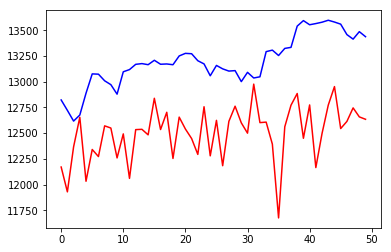

In [232]:
plt.plot(my_test,color='red')
real_value = scaler_2.inverse_transform(test_label)
plt.plot(real_value,color='blue')

C:\Users\sh2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)